<a href="https://colab.research.google.com/github/KazuhisaHonma/2nd_student_ApplicationDevelopment/blob/main/chapter5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# チノふたたび画像から数値を予測しよう

## Lesson19

### データを準備する

In [ ]:
import pandas as pd
from sklearn.datasets import load_digits

digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [ ]:
df = pd.DataFrame(digits.data)
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [ ]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
for i in range(10):
    print(digits.target_names[i])

0
1
2
3
4
5
6
7
8
9


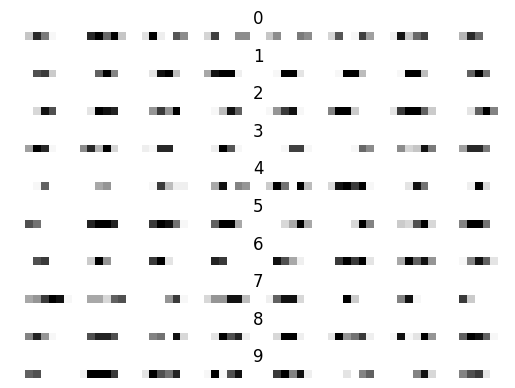

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

for i in range(10):
    plt.subplot(10,1,i+1)
    plt.axis('off')
    plt.title(digits.target[i])
    plt.imshow(digits.data[i:i+1],cmap='Greys')
plt.show()

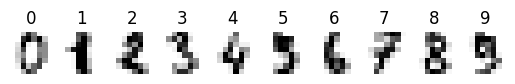

In [ ]:
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.title(digits.target[i])
    plt.imshow(digits.images[i], cmap='Greys')
plt.show()

## Lesson20

### 学習データを準備する

In [ ]:
from sklearn.model_selection import train_test_split

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print('train=', len(X_train))
print('test=', len(X_test))

train= 1347
test= 450


## Lesson21

### 学習させる

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

model = svm.SVC(kernel='rbf', gamma= 0.001)
model.fit(X_train, y_train)

pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print('正解率：', score * 100, '%')

正解率： 99.55555555555556 %


## Lesson22

### 予測させる

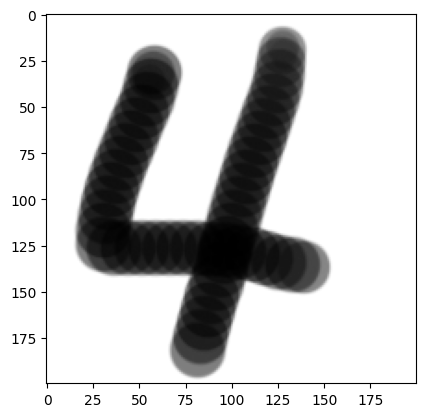

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open('4.png').convert('L')

plt.imshow(image, cmap='gray')
plt.show()

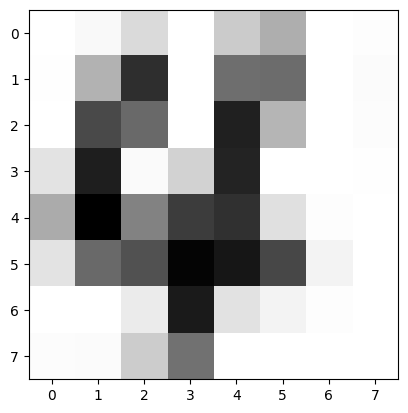

In [ ]:
image = image.resize((8,8), Image.Resampling.LANCZOS) # Image.ANTIALIASはバージョン変更のため使えない
plt.imshow(image, cmap='gray')
plt.show()

In [ ]:
import numpy as np
img = np.asarray(image, dtype=float)
print(img)

[[255. 249. 219. 255. 205. 178. 255. 253.]
 [254. 181.  56. 255. 117. 115. 255. 251.]
 [255.  82. 112. 255.  44. 184. 255. 252.]
 [228.  41. 250. 212.  46. 255. 255. 254.]
 [175.  12. 136.  69.  59. 225. 253. 255.]
 [228. 112.  89.  16.  33.  80. 244. 255.]
 [255. 255. 236.  37. 227. 244. 253. 255.]
 [252. 251. 206. 120. 255. 255. 255. 255.]]


In [ ]:
img = 16 - np.floor(17*img/256)
print(img)

[[ 0.  0.  2.  0.  3.  5.  0.  0.]
 [ 0.  4. 13.  0.  9.  9.  0.  0.]
 [ 0. 11.  9.  0. 14.  4.  0.  0.]
 [ 1. 14.  0.  2. 13.  0.  0.  0.]
 [ 5. 16.  7. 12. 13.  2.  0.  0.]
 [ 1.  9. 11. 15. 14. 11.  0.  0.]
 [ 0.  0.  1. 14.  1.  0.  0.  0.]
 [ 0.  0.  3.  9.  0.  0.  0.  0.]]


In [ ]:
img = img.flatten()
print(img)

[ 0.  0.  2.  0.  3.  5.  0.  0.  0.  4. 13.  0.  9.  9.  0.  0.  0. 11.
  9.  0. 14.  4.  0.  0.  1. 14.  0.  2. 13.  0.  0.  0.  5. 16.  7. 12.
 13.  2.  0.  0.  1.  9. 11. 15. 14. 11.  0.  0.  0.  0.  1. 14.  1.  0.
  0.  0.  0.  0.  3.  9.  0.  0.  0.  0.]


In [ ]:
print(digits.data[:1])

[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]]


In [ ]:
predict = model.predict([img])
print('予測=', predict)

予測= [4]


予測= [6]


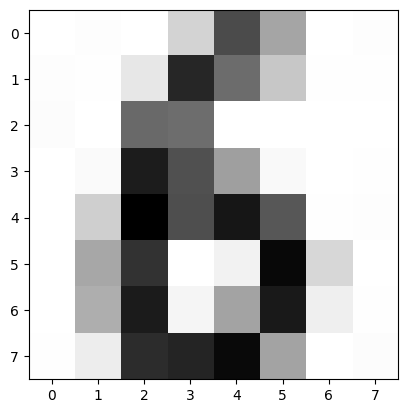

In [ ]:
image = Image.open('6.png').convert('L')
image = image.resize((8,8), Image.Resampling.LANCZOS)
img = np.asarray(image, dtype=float)
img = 16 - np.floor(17*img/256)
img = img.flatten()

predict = model.predict([img])
print('予測=', predict)

plt.imshow(image, cmap='gray')
plt.show()

## Lesson23

### 教師なし学習を利用して、データをイメージしよう

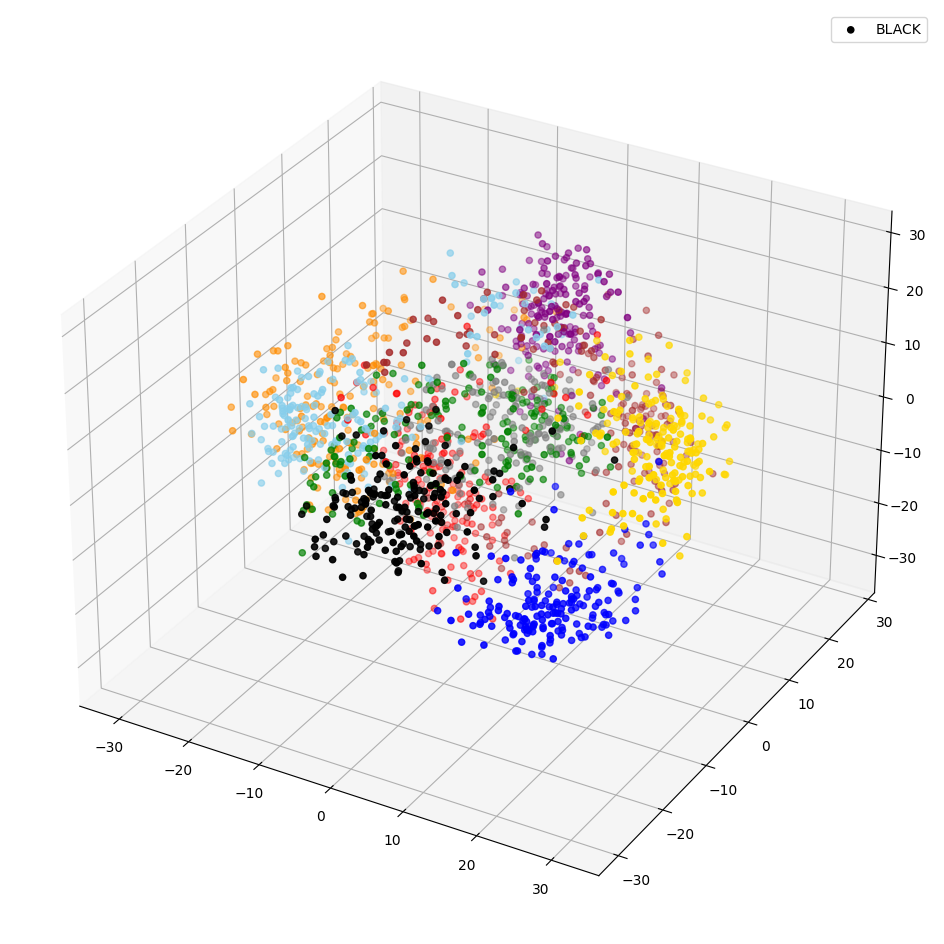

In [ ]:
from sklearn.datasets import load_digits
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D

digits = load_digits()
X = digits.data
y = digits.target
# 0~9の色名を用意する
numbercolor = ['BLACK', 'BROWN', 'RED', 'DARKORANGE', 'GOLD', 'GREEN', 'BLUE', 'PURPLE',
               'GRAY', 'SKYBLUE']
# yの値を色に変えて、colorリストを作る
colors = []
for i in y:
    colors.append(numbercolor[i])

# 主成分分析で、64個の特徴量を3個へと次元を減らす
pca = decomposition.PCA(n_components=3)
features3 = pca.fit_transform(X)

# 3個へ減らしたデータ(features3)で、データフレームを作る
df = pd.DataFrame(features3)

# 3D散布図の準備
fig = plt.figure(figsize=(12,12,))
ax = fig.add_subplot(111, projection='3d')
# 3個の特徴量をX ,Y,Zにして、各点の数字に対応する色で散布図を描画
ax.scatter(df[0], df[1], df[2], c=colors)

# 数字がどの色かの見本を描画
ty = 0
for col in numbercolor:
    ax.text(50,30,30-ty*5, str(ty),size=20, color=col)
    ty += 1
plt.savefig('pca.png')
plt.show()

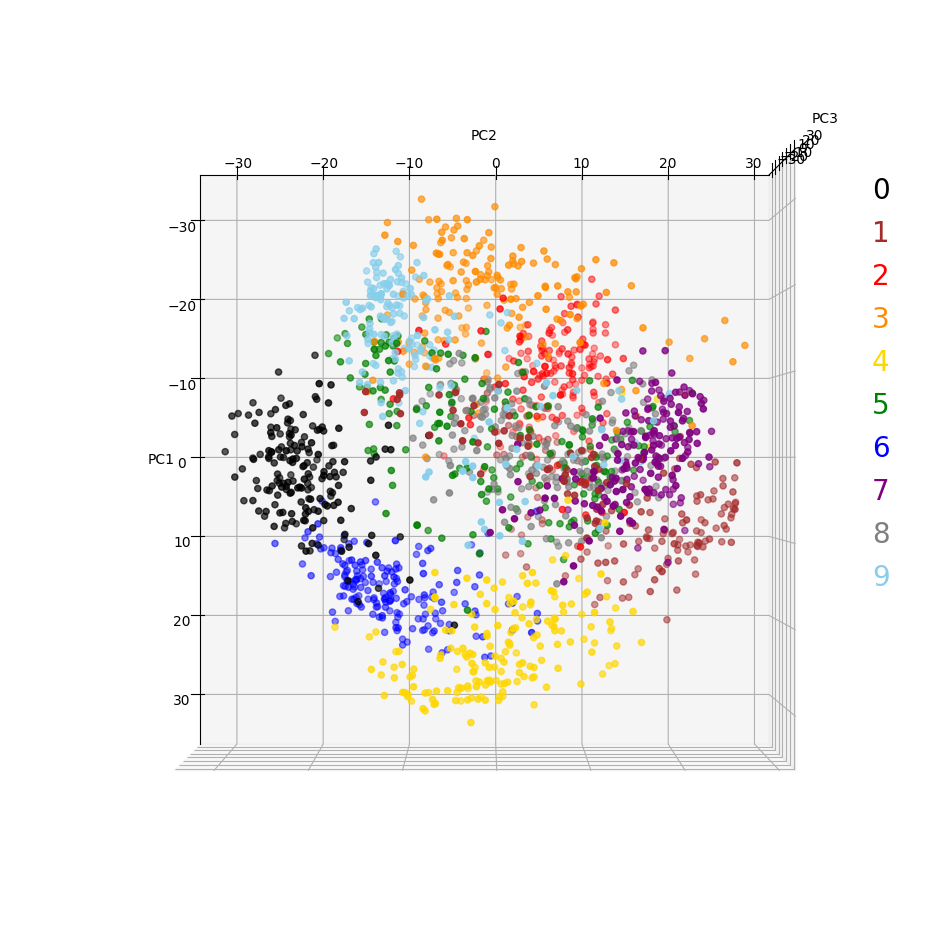

In [ ]:
# 視点を変えて描画
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
# 各点の数字に対応する色で散布図を描画
ax.scatter(df[0], df[1], df[2], color=colors)

# 数字がどの色かの見本を描画
ty = 0
for col in numbercolor:
    ax.text(-30+ty*5,40,30, str(ty), size=20, color=col)
    ty += 1
ax.view_init(90,0)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.savefig('pca2.png')
plt.show()